<a href="https://colab.research.google.com/github/Chunshan-Theta/dataflowr/blob/master/Notebooks/02_basics_pytorch_colab_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch的基礎

In [68]:
!pip install torch

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [70]:
torch.__version__

'1.6.0+cu101'

大量參考這份文件 [What is PyTorch?](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)

`Tensors`(張量)用於編碼轉譯一些要處理的信號，也用於模型的內部狀態和參數的編碼。

**轉譯編碼後可以有效提升運算速度**



建構一個 3x5 矩陣:

In [5]:
torch.set_default_tensor_type('torch.FloatTensor')

In [6]:
x = torch.empty(3,5)
print(x.type())
print(x)

torch.FloatTensor
tensor([[4.6723e-36, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan],
        [0.0000e+00, 1.1578e+27, 1.1362e+30, 7.1547e+22, 4.5828e+30],
        [1.2121e+04, 7.1846e+22, 9.2198e-39, 7.0374e+22, 1.6333e-36]])


如果有發生記憶體相關的問題，這裡也許會有幫助[stackoverflow link](https://stackoverflow.com/questions/50617917/overflow-when-unpacking-long-pytorch)


In [66]:
x = torch.randn(3,5)
print(x)

tensor([[-0.0902, -0.3424, -0.1972,  0.4558, -1.0039],
        [ 0.5315,  1.7790, -0.3409,  0.7170, -1.8139],
        [ 0.5932,  0.1281,  0.3643,  0.9033,  0.1223]])


In [ ]:
print(x.size())

torch.Size([3, 5])


torch.Size 事實上是一個 [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences)形式物件, 所以也支援`tuple`相關的操作
.

In [ ]:
x.size()[1]

5

In [ ]:
x.size() == (3,5)

True

### 連接至 `numpy`

In [65]:
y = x.numpy()
print(y)

[-0.8474603]


In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
xr = torch.randn(3, 5)
print(xr)

tensor([[ 1.1868, -1.5908,  0.4241,  1.2335, -1.5417],
        [-0.6854, -0.2808,  0.0779, -0.4235, -0.5007],
        [-2.5271, -0.3923, -0.6812,  1.1552,  0.5917]])


In [ ]:
xr + b

tensor([[ 2.1868, -0.5908,  1.4241,  2.2335, -0.5417],
        [ 0.3146,  0.7192,  1.0779,  0.5765,  0.4993],
        [-1.5271,  0.6077,  0.3188,  2.1552,  1.5917]], dtype=torch.float64)

[Broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)

當需要執行時，`Broadcasting`會透過自動複製係數來擴展象限。
1. 當`tensor`其中之一小於其他的時候，會透過增加許多大小為1的張量來重新塑形。
2. 對於每個不合的張量，假若兩個張量中其中一個是大小為1，會依靠複製該向量係數來擴展該象限

* 假若有個張量大小不合，且他們之中大小皆不為1時，會引發錯誤導致失敗

In [ ]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
print(A.size())
B = torch.tensor([[5., -5., 5., -5., 5.]])
print(B.size())
C = A + B

torch.Size([4, 1])
torch.Size([1, 5])


In [ ]:
C

tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])

[(1+5), (1+-5), (1+5), (1+-5), (1+5)]

[(2+5), (2+-5), (2+5), (2+-5), (2+5)]

[(3+5), (3+-5), (3+5), (3+-5), (3+5)]

[(4+5), (4+-5), (4+5), (4+-5), (4+5)]

In [ ]:
print(x+xr)

tensor([[-0.2481, -1.0138, -0.7725,  0.0905, -0.7471],
        [-0.2937,  2.0548,  0.1938, -0.9474,  0.0232],
        [-2.6818, -1.8715,  0.3730,  0.0598,  0.1549]])


In [ ]:
x.add_(xr)
print(x)

tensor([[-0.2481, -1.0138, -0.7725,  0.0905, -0.7471],
        [-0.2937,  2.0548,  0.1938, -0.9474,  0.0232],
        [-2.6818, -1.8715,  0.3730,  0.0598,  0.1549]])


任何改變張量的操作方法都會有對應方法可以修訂原來變數，多是在原方法最後加上一個底線符號```_```

例如： ```x.copy_(y)```, ```x.t_()```, 都將改變變數 ```x```.

In [ ]:
print(x)
print('-'*15)
print(x.t())
print('-'*15)
print(x)

tensor([[-1.0455,  1.4290,  0.1825, -1.3100,  1.8578],
        [-0.5430, -1.2334, -0.0227,  0.6117, -1.4637],
        [ 0.6099,  1.4112,  0.7206,  0.5938,  0.0728]])
---------------
tensor([[-1.0455, -0.5430,  0.6099],
        [ 1.4290, -1.2334,  1.4112],
        [ 0.1825, -0.0227,  0.7206],
        [-1.3100,  0.6117,  0.5938],
        [ 1.8578, -1.4637,  0.0728]])
---------------
tensor([[-1.0455,  1.4290,  0.1825, -1.3100,  1.8578],
        [-0.5430, -1.2334, -0.0227,  0.6117, -1.4637],
        [ 0.6099,  1.4112,  0.7206,  0.5938,  0.0728]])


In [ ]:
x.t_()
print(x)

tensor([[-1.0455,  1.4290,  0.1825, -1.3100,  1.8578],
        [-0.5430, -1.2334, -0.0227,  0.6117, -1.4637],
        [ 0.6099,  1.4112,  0.7206,  0.5938,  0.0728]])


若你執行了這個操作，當這個張量被改變時，`numpy`矩陣也會被改變，反之亦然

In [64]:
print(y)

NameError: ignored

In [ ]:
np.add(a, 1, out=a)
print(b)
print(c)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cpu')
#device = torch.device('cuda') # 指定使用GPU計算

In [ ]:
x.device

device(type='cuda', index=0)

In [ ]:
# 如果使用GPU需要執行以下指令
# 我們使用``torch.device``物件來移動GPU進出的張量
if torch.cuda.is_available():
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)             # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))      # ``.to`` can also change dtype together!

tensor([1.3313])
tensor([1.3313], dtype=torch.float64)


In [67]:
x = torch.randn(1)
x = x.to(device)

NameError: ignored

In [ ]:
x.device

device(type='cuda', index=0)

In [ ]:
#這些只領只有在GPU環境下可以使用
x = x.data
print(x)
print(x.item())
print(x.cpu().numpy())

tensor([0.9354], device='cuda:0')
0.9354118704795837
[0.9354119]


## narrow

In [48]:
import torch

In [32]:
x = torch.randn(5,5)
x

tensor([[ 1.3187, -0.3127, -0.2685,  0.4274, -1.5112],
        [-0.2820, -0.8236,  0.7857, -0.2580,  1.3721],
        [-1.2644,  0.0909, -0.5658,  0.9496,  0.5032],
        [-2.9546,  0.9611, -0.2027, -1.2023,  0.6758],
        [ 1.9158,  0.0278, -0.6864,  0.1419, -0.2381]])

In [39]:
print(x.narrow(0, 0, 5))
print(x.narrow(0, 0, 4))
print(x.narrow(1, 0, 3))
print(x.narrow(1, 2, 2))

tensor([[ 1.3187, -0.3127, -0.2685,  0.4274, -1.5112],
        [-0.2820, -0.8236,  0.7857, -0.2580,  1.3721],
        [-1.2644,  0.0909, -0.5658,  0.9496,  0.5032],
        [-2.9546,  0.9611, -0.2027, -1.2023,  0.6758],
        [ 1.9158,  0.0278, -0.6864,  0.1419, -0.2381]])
tensor([[ 1.3187, -0.3127, -0.2685,  0.4274, -1.5112],
        [-0.2820, -0.8236,  0.7857, -0.2580,  1.3721],
        [-1.2644,  0.0909, -0.5658,  0.9496,  0.5032],
        [-2.9546,  0.9611, -0.2027, -1.2023,  0.6758]])
tensor([[ 1.3187, -0.3127, -0.2685],
        [-0.2820, -0.8236,  0.7857],
        [-1.2644,  0.0909, -0.5658],
        [-2.9546,  0.9611, -0.2027],
        [ 1.9158,  0.0278, -0.6864]])
tensor([[-0.2685,  0.4274],
        [ 0.7857, -0.2580],
        [-0.5658,  0.9496],
        [-0.2027, -1.2023],
        [-0.6864,  0.1419]])


# 使用簡單的使用者介面來標準化圖像資料基礎

In [73]:
import numpy as np
import torchvision

data_dir = 'content/data'

cifar = torchvision.datasets.CIFAR10(data_dir, train = True, download = True)
x = torch.from_numpy(cifar.data).transpose(1, 3).transpose(2, 3).float()
x = x / 255
print(x.type(), x.size(), x.min().item(), x.max().item())

Files already downloaded and verified
torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


In [50]:
# Showing images
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    

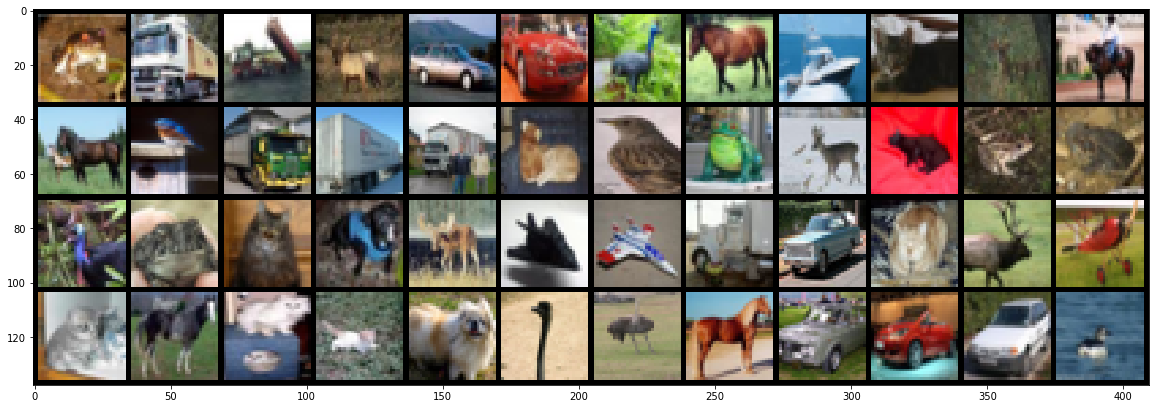

In [74]:
# 縮小第一張圖像，並轉換為浮點數
x = x.narrow(0, 0, 48).float()
show(torchvision.utils.make_grid(x, nrow = 12))

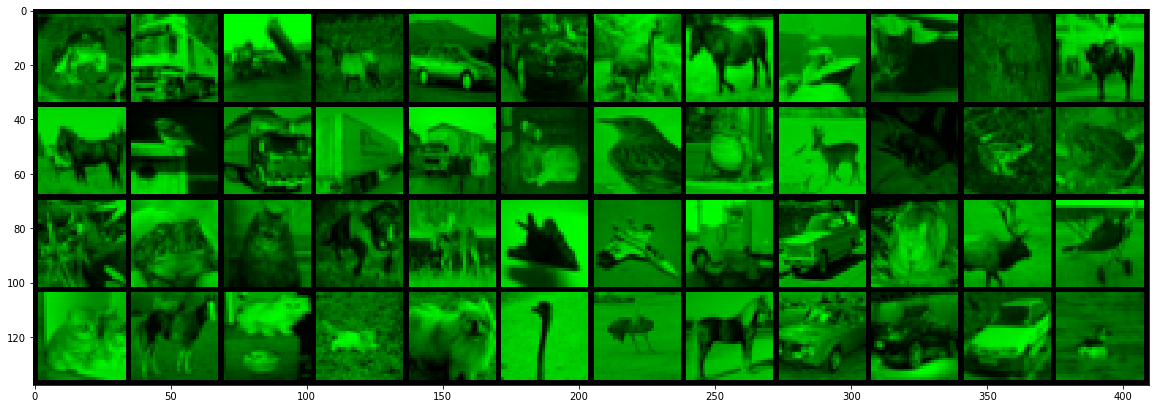

In [75]:
# 刪除藍色與綠色像素
x2 = x.clone().detach()
x2.narrow(1, 0, 1).fill_(0)
x2.narrow(1, 2, 1).fill_(0)
show(torchvision.utils.make_grid(x2, nrow = 12))

48
3


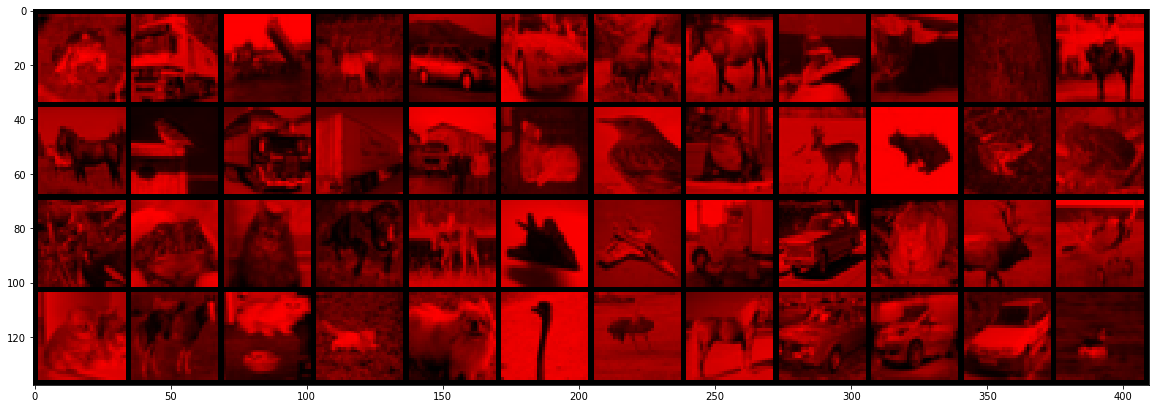

In [77]:
# 刪除藍色與綠色像素
x1 = x.clone().detach()
print(len(x1))
print(len(x1[0]))
x1.narrow(1, 1, 2).fill_(0)
show(torchvision.utils.make_grid(x1, nrow = 12))

48
3


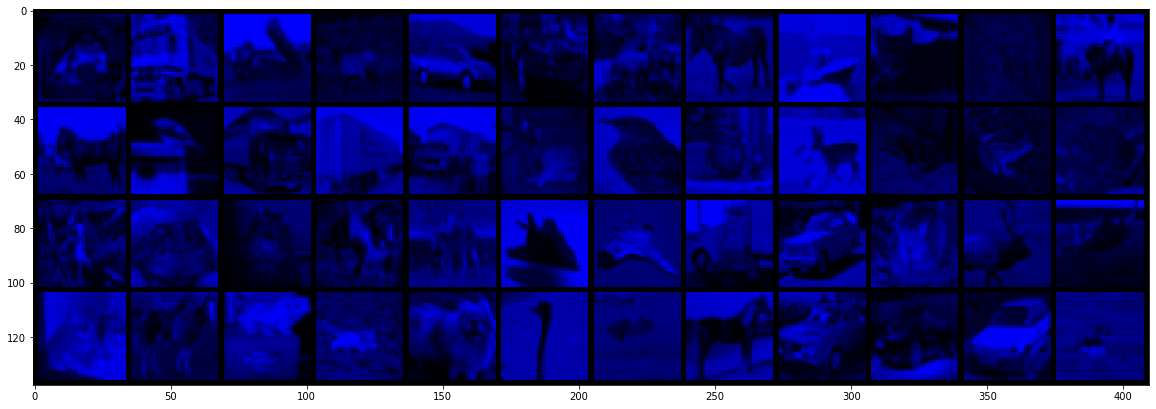

In [76]:
# 刪除藍色與綠色像素
x1 = x.clone().detach()
print(len(x1))
print(len(x1[0]))
x1.narrow(1, 0, 2).fill_(0)
show(torchvision.utils.make_grid(x1, nrow = 12))

# Autograd：自動差異化（automatic differentiation）
在執行`tensor`運算時，`PyTorch`可以即時地自動構建運算圖，用以計算所有相關的`tensor`梯度。

In [78]:
x = torch.ones(2, 2)
print(x)

tensor([[1., 1.],
        [1., 1.]])



一個Tensor具有一個`Boolean`字段**requires_grad**，默認情況下設置為False，該字段指出PyTorch是否應該構建操作圖，以便可以計算其梯度。

In [79]:
x.requires_grad

False

In [80]:
x.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [81]:
x.requires_grad_(True)
x.requires_grad

True

In [82]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [83]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [84]:
y.requires_grad

True

In [85]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)



計算完成後，即`_forward pass_`方法，您可以調用`.backward（）`並自動計算所有梯度

In [86]:
out.backward()

梯度w.r.t.這個變量被總計到`.grad`中。


In [87]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Let’s call the ``out``
*Variable* “$o$”.
We have that:

$y_i = x_i+2$

$z_i = 3 y_i^2$ 

$o = \frac{1}{4}\sum_i z_i$ 

**Forward pass:**

$y_i\bigr\rvert_{x_i=1} = 3$

$z_i\bigr\rvert_{y_i=3} = 27$

$o\bigr\rvert_{z_i=27} = 27$.

Taking partial derivatives give:

$\frac{\partial o}{\partial z_i} = \frac{1}{4}$

$\frac{\partial z_i}{\partial y_i} = 6 y_i$

$\frac{\partial y_i}{\partial x_i} =1$


hence by the **chain-rule:**

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{\partial o}{\partial z_i}\bigr\rvert_{z_i=27}\frac{\partial z_i}{\partial y_i}\bigr\rvert_{y_i=3}\frac{\partial y_i}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{1}{4} * 18 * 1 = 4.5$.

In [88]:
print(y.grad)

None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


[Why cant I see .grad of an intermediate variable?](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94)

In [89]:
out.backward()

RuntimeError: ignored

In [ ]:
x = torch.ones(2, 2)
x.requires_grad_(True)
y = x+2
z = 3 * y ** 2 
out = z.mean()

out.backward(retain_graph=True)

In [ ]:
print(x.grad)

In [ ]:
out.backward(retain_graph=True)

In [ ]:
print(x.grad)

In [ ]:
out.backward(retain_graph=True)

In [ ]:
print(x.grad)

In [ ]:
# Manually zero the gradients after updating weights
x.grad.data.zero_()

梯度必須手動設置為零。否則，它們將在多個`_.backward（）_`調用中總計。 該總計行為用以計算在多個『小批量』上求和的損耗的斜率或損耗和的斜率。


In [ ]:
out.backward()

In [ ]:
print(x.grad)

# Playing with pytorch: linear regression

## Warm-up: Linear regression with numpy

Our model is:
$$
y_t = 2x^1_t-3x^2_t+1, \quad t\in\{1,\dots,30\}
$$

Our task is given the 'observations' $(x_t,y_t)_{t\in\{1,\dots,30\}}$ to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$.

In order to do so, we will solve the following optimization problem:
$$
\underset{w^1,w^2,b}{\operatorname{argmin}} \sum_{t=1}^{30} \left(w^1x^1_t+w^2x^2_t+b-y_t\right)^2
$$

In [ ]:
import numpy as np
from numpy.random import random
# generate random input data
x = random((30,2))

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

In [ ]:
x[:5]

array([[0.55089948, 0.87657511],
       [0.39147281, 0.27633551],
       [0.150616  , 0.19139041],
       [0.89502255, 0.86739523],
       [0.00907036, 0.17062502]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

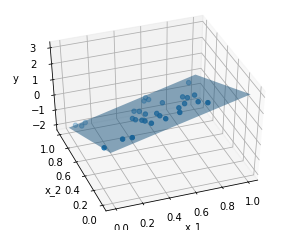

In [ ]:
plot_views(x, y, w_source, b_source)

In vector form, we define:
$$
\hat{y}_t = {\bf w}^T{\bf x}_t+b
$$
and we want to minimize the loss given by:
$$
loss = \sum_t\underbrace{\left(\hat{y}_t-y_t \right)^2}_{loss_t}.
$$

To minimize the loss we first compute the gradient of each $loss_t$:
\begin{eqnarray*}
\frac{\partial{loss_t}}{\partial w^1} &=& 2x^1_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial w^2} &=& 2x^2_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial b} &=& 2\left({\bf w}^T{\bf x}_t+b-y_t \right)
\end{eqnarray*}

For one epoch, **Stochastic Gradient Descent with minibatches of size 1** then updates the weigts and bias by running the following loop: 

for $t \in \{1,\dots,30\}$, 

\begin{eqnarray*}
w^1_{t+1}&=&w^1_{t}-\alpha\frac{\partial{loss_t}}{\partial w^1} \\
w^2_{t+1}&=&w^2_{t}-\alpha\frac{\partial{loss_t}}{\partial w^2} \\
b_{t+1}&=&b_{t}-\alpha\frac{\partial{loss_t}}{\partial b},
\end{eqnarray*}

if $t = 30$, set $w^1_1=w^1_{31}$, $w^2_1 = w^2_{31}$ and $b_1=b_{31}$.

$\alpha>0$ is called the learning rate.

Then we run several epochs...

In [ ]:
# randomly initialize learnable weights and bias
w_init = random(2)
b_init = random(1)

w = w_init
b = b_init
print("initial values of the parameters:", w, b )


# our model forward pass
def forward(x):
    return x.dot(w)+b

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2 

print("initial loss:", np.sum([loss(x_val,y_val) for x_val, y_val in zip(x, y)]) )

# compute gradient
def gradient(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*(x.dot(w)+b - y)*x, 2 * (x.dot(w)+b - y)
 
learning_rate = 1e-2
# Training loop with minibatch (of size 1)
for epoch in range(10):
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w, grad_b = gradient(x_val, y_val)
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        l += loss(x_val, y_val)

    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b )

initial values of the parameters: [0.65856077 0.60945065] [0.67430112]
initial loss: 56.87376647468165
progress: epoch: 0 loss 37.48585138390794
progress: epoch: 1 loss 24.67863880495458
progress: epoch: 2 loss 21.382582266441215
progress: epoch: 3 loss 19.612424861119788
progress: epoch: 4 loss 18.153256906158436
progress: epoch: 5 loss 16.822557858999698
progress: epoch: 6 loss 15.59058144783638
progress: epoch: 7 loss 14.448615386229323
progress: epoch: 8 loss 13.390436829149097
progress: epoch: 9 loss 12.410156431388064
estimation of the parameters: [ 0.95281781 -0.74467965] [0.25973271]


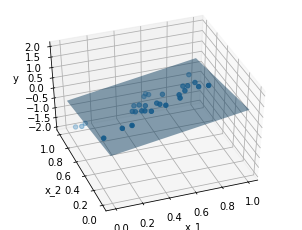

In [ ]:
plot_views(x, y, w, b)

Note that the actual gradient of the loss is given by:
$$
\frac{\partial{loss}}{\partial w^1} =\sum_t \frac{\partial{loss_t}}{\partial w^1},\quad
\frac{\partial{loss}}{\partial w^2} =\sum_t \frac{\partial{loss_t}}{\partial w^2},\quad
\frac{\partial{loss}}{\partial b} =\sum_t \frac{\partial{loss_t}}{\partial b}
$$

For one epoch, **(Batch) Gradient Descent** updates the weights and bias as follows:
\begin{eqnarray*}
w^1_{new}&=&w^1_{old}-\alpha\frac{\partial{loss}}{\partial w^1} \\
w^2_{new}&=&w^2_{old}-\alpha\frac{\partial{loss}}{\partial w^2} \\
b_{new}&=&b_{old}-\alpha\frac{\partial{loss}}{\partial b},
\end{eqnarray*}

and then we run several epochs.

Exercice: explain the difference between the 2 schemes?

In [ ]:
w = w_init
b = b_init
print("initial values of the parameters:", w, b )

learning_rate = 1e-2
# Training loop
for epoch in range(10):
    grad_w = np.array([0,0])
    grad_b = np.array(0)
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w = np.add(grad_w,gradient(x_val, y_val)[0])
        grad_b = np.add(grad_b,gradient(x_val, y_val)[1])
        l += loss(x_val, y_val)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b
    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b)

initial values of the parameters: [0.65856077 0.60945065] [0.67430112]
progress: epoch: 0 loss 56.873766474681645
progress: epoch: 1 loss 24.841564989332884
progress: epoch: 2 loss 22.802944909011156
progress: epoch: 3 loss 21.120311090017317
progress: epoch: 4 loss 19.564005681924158
progress: epoch: 5 loss 18.123116931910232
progress: epoch: 6 loss 16.78904191496159
progress: epoch: 7 loss 15.553830710360252
progress: epoch: 8 loss 14.41012661092687
progress: epoch: 9 loss 13.351121717422755
estimation of the parameters: [ 0.94666051 -0.75042318] [0.27264143]


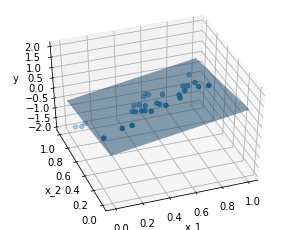

In [ ]:
plot_views(x, y, w, b)

## Linear regression with tensors

In [ ]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

In [ ]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

This is an implementation of **(Batch) Gradient Descent** with tensors.

Note that in the main loop, the functions loss_t and gradient_t are always called with the same inputs: they can easily be incorporated into the loop (we'll do that below).

In [ ]:
w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print("initial values of the parameters:", w_t, b_t )

# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

learning_rate = 1e-2
for epoch in range(10):
    l_t = loss_t(x_t,y_t)
    grad_w, grad_b = gradient_t(x_t,y_t)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l_t)

# After training
print("estimation of the parameters:", w_t, b_t )

initial values of the parameters: tensor([[0.6586],
        [0.6095]]) tensor([[0.6743]])
progress: epoch: 0 loss tensor(56.8738)
progress: epoch: 1 loss tensor(24.8416)
progress: epoch: 2 loss tensor(22.8029)
progress: epoch: 3 loss tensor(21.1203)
progress: epoch: 4 loss tensor(19.5640)
progress: epoch: 5 loss tensor(18.1231)
progress: epoch: 6 loss tensor(16.7890)
progress: epoch: 7 loss tensor(15.5538)
progress: epoch: 8 loss tensor(14.4101)
progress: epoch: 9 loss tensor(13.3511)
estimation of the parameters: tensor([[ 0.9467],
        [-0.7504]]) tensor([[0.2726]])


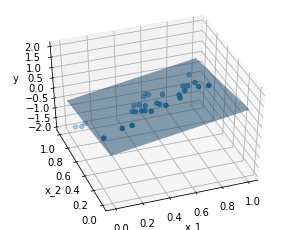

In [ ]:
plot_views(x, y, w_t.numpy(), b_t.numpy())

## Linear regression with Autograd

In [ ]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w_v = w_init_t.clone().unsqueeze(1)
w_v.requires_grad_(True)
b_v = b_init_t.clone().unsqueeze(1)
b_v.requires_grad_(True)
print("initial values of the parameters:", w_v.data, b_v.data )

initial values of the parameters: tensor([[0.6586],
        [0.6095]]) tensor([[0.6743]])


An implementation of **(Batch) Gradient Descent** without computing explicitly the gradient and using autograd instead.

In [ ]:
for epoch in range(10):
    y_pred = x_t.mm(w_v)+b_v
    loss = (y_pred - y_t).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to w and b respectively.
    loss.backward()
    
    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w_v and b_v in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        w_v -= learning_rate * w_v.grad
        b_v -= learning_rate * b_v.grad
    
    # Manually zero the gradients after updating weights
    # otherwise gradients will be acumulated after each .backward()
    w_v.grad.zero_()
    b_v.grad.zero_()
    
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:", w_v.data, b_v.data.t() )

progress: epoch: 0 loss 56.87377166748047
progress: epoch: 1 loss 24.841564178466797
progress: epoch: 2 loss 22.802947998046875
progress: epoch: 3 loss 21.12030601501465
progress: epoch: 4 loss 19.564006805419922
progress: epoch: 5 loss 18.123117446899414
progress: epoch: 6 loss 16.78904151916504
progress: epoch: 7 loss 15.553831100463867
progress: epoch: 8 loss 14.410124778747559
progress: epoch: 9 loss 13.351123809814453
estimation of the parameters: tensor([[ 0.9467],
        [-0.7504]]) tensor([[0.2726]])


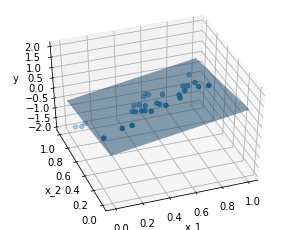

In [ ]:
plot_views(x, y, w_v.data.numpy(), b_v.data.numpy())

## Linear regression with neural network

An implementation of **(Batch) Gradient Descent** using the nn package. Here we have a super simple model with only one layer and no activation function!

In [ ]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

# switch to train mode
model.train()

for epoch in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x_t)
  
    # Note this operation is equivalent to: pred = model.forward(x_v)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y_t)

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its data and gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad
        
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 56.8737678527832
progress: epoch: 1 loss 24.841564178466797
progress: epoch: 2 loss 22.80294418334961
progress: epoch: 3 loss 21.120309829711914
progress: epoch: 4 loss 19.56400489807129
progress: epoch: 5 loss 18.12311553955078
progress: epoch: 6 loss 16.78904151916504
progress: epoch: 7 loss 15.55383014678955
progress: epoch: 8 loss 14.410125732421875
progress: epoch: 9 loss 13.35112190246582
estimation of the parameters:
Parameter containing:
tensor([[ 0.9467, -0.7504]], requires_grad=True)
Parameter containing:
tensor([0.2726], requires_grad=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Last step, we use directly the optim package to update the weights and bias.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(size_average=False)

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch:", epoch, "loss",loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 56.8737678527832
progress: epoch: 1 loss 24.841564178466797
progress: epoch: 2 loss 22.80294418334961
progress: epoch: 3 loss 21.120309829711914
progress: epoch: 4 loss 19.56400489807129
progress: epoch: 5 loss 18.12311553955078
progress: epoch: 6 loss 16.78904151916504
progress: epoch: 7 loss 15.55383014678955
progress: epoch: 8 loss 14.410126686096191
progress: epoch: 9 loss 13.351120948791504
estimation of the parameters:
Parameter containing:
tensor([[ 0.9467, -0.7504]], requires_grad=True)
Parameter containing:
tensor([0.2726], requires_grad=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Exercise 1: Play with the code

Change the number of samples from 30 to 300. What happens? How to correct it?

In the initialization phase, remove the .clone() What happens? Why?

In [ ]:
x = random((300,2))
y = np.dot(x, [2., -3.]) + 1.
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(size_average=True)

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=10*learning_rate)


for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch:", epoch, "loss",loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 2.0425631999969482
progress: epoch: 1 loss 1.5865057706832886
progress: epoch: 2 loss 1.3460155725479126
progress: epoch: 3 loss 1.2099395990371704
progress: epoch: 4 loss 1.124800205230713
progress: epoch: 5 loss 1.0648553371429443
progress: epoch: 6 loss 1.0177010297775269
progress: epoch: 7 loss 0.9773483872413635
progress: epoch: 8 loss 0.9408941864967346
progress: epoch: 9 loss 0.9069197773933411
estimation of the parameters:
Parameter containing:
tensor([[ 0.6947, -0.1980]], requires_grad=True)
Parameter containing:
tensor([0.2105], requires_grad=True)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


## Exercise 2: Logistic regression

Sigmoid function:
$$
\sigma(y) = \frac{1}{1+e^{-y}}
$$

The model is now
$$
Z_t = Ber(\sigma(y_t)), \quad t\in\{1,\dots,30\},
$$
and the task is still to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$ but now from the observations $(x_t,Z_t)_{t\in \{1,\dots,30\}}$.

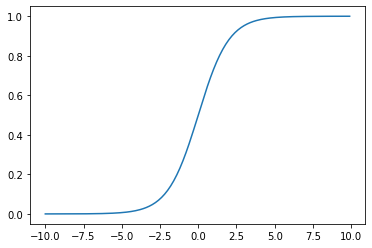

In [ ]:
from scipy.special import expit
xaxis = torch.arange(-10.0, 10.0, 0.1)
plt.plot(xaxis, [torch.sigmoid(x) for x in xaxis]);

In [ ]:
import numpy as np
from numpy.random import random
# generate random input data
x = random((100,2))
x_t = torch.from_numpy(x).float()
x_t.requires_grad_(True)

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

from scipy.stats import bernoulli
Z = bernoulli.rvs(expit(y))
print(Z)

[1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0]


What is an appropriate loss function now?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)

for m in model.children():
    if m.__class__ == torch.nn.Linear:
        m.weight.data = w_init_t.clone().unsqueeze(0)
        m.bias.data = b_init_t.clone()

loss_fn = torch.nn.BCELoss(reduction='sum')

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(10):
    y_pred = model(x_t).squeeze()
    loss = loss_fn(y_pred, torch.from_numpy(Z).float())
    print("progress:", "epoch:", epoch, "loss",loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 73.22077178955078
progress: epoch: 1 loss 69.50163269042969
progress: epoch: 2 loss 67.43074035644531
progress: epoch: 3 loss 66.3198013305664
progress: epoch: 4 loss 65.71023559570312
progress: epoch: 5 loss 65.34503936767578
progress: epoch: 6 loss 65.09504699707031
progress: epoch: 7 loss 64.899658203125
progress: epoch: 8 loss 64.73135375976562
progress: epoch: 9 loss 64.57796478271484
estimation of the parameters:
Parameter containing:
tensor([[0.6606, 0.0390]], requires_grad=True)
Parameter containing:
tensor([0.1510], requires_grad=True)


## Exercise 3: Perceptron on MNIST

In [ ]:
import torch
import torchvision

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device : ', device)

data_dir = 'content/data/MNIST/'
t_func = torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])
mnist_train = torchvision.datasets.MNIST(data_dir, train = True, download = True, transform = t_func)
mnist_test = torchvision.datasets.MNIST(data_dir, train = False, download = True, transform = t_func)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(mnist_test , batch_size=64, shuffle=False)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(784,100)
        self.linear2 = torch.nn.Linear(100,10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        return x
      
net = Net()
net = net.to(device)
opt = torch.optim.SGD(net.parameters(), lr=0.01)
crit = torch.nn.CrossEntropyLoss(reduction='mean')
    
for epoch in range(10):
    net.train()
    for (x,y) in train_loader:
        x,y = x.to(device), y.to(device)
        opt.zero_grad()
        out = net(x)
        preds = out.data.max(1)[1]
        acc = preds.eq(y).sum().item()
        loss = crit(out, y)
        loss.backward()
        opt.step()
    net.eval()                                  
    for (x,y) in test_loader:
        x,y = x.to(device), y.to(device)
        out = net(x)
        preds = out.data.max(1)[1]
        acc += preds.eq(y).sum().item()
        loss += crit(out, y).item()
    acc /= len(test_loader.dataset)
    loss /= len(test_loader.dataset)
    print('epoch %d : acc %f, loss %f'%(epoch, acc, loss))

0it [00:00, ?it/s]

device :  cuda


9920512it [00:02, 3710050.36it/s]                             


Extracting content/data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to content/data/MNIST/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 58225.10it/s]                           
0it [00:00, ?it/s]

Extracting content/data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to content/data/MNIST/MNIST/raw


1654784it [00:01, 969732.06it/s]                            
0it [00:00, ?it/s]

Extracting content/data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to content/data/MNIST/MNIST/raw


8192it [00:00, 21463.37it/s]            


Extracting content/data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to content/data/MNIST/MNIST/raw
Processing...
Done!
epoch 0 : acc 0.913000, loss 0.004976
epoch 1 : acc 0.927100, loss 0.004155
epoch 2 : acc 0.939100, loss 0.003641
epoch 3 : acc 0.944700, loss 0.003275
epoch 4 : acc 0.949400, loss 0.002976
epoch 5 : acc 0.955200, loss 0.002660
epoch 6 : acc 0.957200, loss 0.002476
epoch 7 : acc 0.960800, loss 0.002332
epoch 8 : acc 0.964000, loss 0.002181
epoch 9 : acc 0.966400, loss 0.002088
